<a href="https://colab.research.google.com/github/sreeedu/chatgpt/blob/master/first_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import time
start_time = time.time()

In [ ]:
%%time

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('train.csv')


In [ ]:
%%time
# 1. Summary of the dataset
# General overview
print("Dataset Overview:")
print(df.info())
print("\nSummary statistics:")
print(df.describe(include='all'))  # Summarizes each column

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93686 entries, 0 to 93685
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   category            93686 non-null  object
 1   sub_category        87095 non-null  object
 2   crimeaditionalinfo  93665 non-null  object
dtypes: object(3)
memory usage: 2.1+ MB
None

Summary statistics:
                      category        sub_category  \
count                    93686               87095   
unique                      15                  35   
top     Online Financial Fraud  UPI Related Frauds   
freq                     57434               26856   

                                       crimeaditionalinfo  
count                                               93665  
unique                                              85013  
top     Respected Sir\r\n\r\nA very serious matter I w...  
freq                                                 2342

In [ ]:
%%time
# 2. Frequency of each category
category_counts = df['category'].value_counts()
print("\nCategory Frequency:")
print(category_counts)


Category Frequency:
category
Online Financial Fraud                                  57434
Online and Social Media Related Crime                   12140
Any Other Cyber Crime                                   10878
Cyber Attack/ Dependent Crimes                           3608
RapeGang Rape RGRSexually Abusive Content                2822
Sexually Obscene material                                1838
Hacking  Damage to computercomputer system etc           1710
Sexually Explicit Act                                    1552
Cryptocurrency Crime                                      480
Online Gambling  Betting                                  444
Child Pornography CPChild Sexual Abuse Material CSAM      379
Online Cyber Trafficking                                  183
Cyber Terrorism                                           161
Ransomware                                                 56
Report Unlawful Content                                     1
Name: count, dtype: int64


In [ ]:
%%time
# 3. Frequency of each subcategory
subcategory_counts = df['sub_category'].value_counts()
print("\nSubcategory Frequency:")
print(subcategory_counts)


Subcategory Frequency:
sub_category
UPI Related Frauds                                                      26856
Other                                                                   10878
DebitCredit Card FraudSim Swap Fraud                                    10805
Internet Banking Related Fraud                                           8872
Fraud CallVishing                                                        5803
Cyber Bullying  Stalking  Sexting                                        4089
EWallet Related Fraud                                                    4047
FakeImpersonating Profile                                                2299
Profile Hacking Identity Theft                                           2073
Cheating by Impersonation                                                1988
Unauthorised AccessData Breach                                           1114
Online Job Fraud                                                          912
DematDepository Fraud      

In [ ]:
%%time
# 4. Number of unique entries in crimeaditionalinfo
unique_crime_entries = df['crimeaditionalinfo'].nunique()
print(f"\nNumber of unique entries in 'crimeaditionalinfo': {unique_crime_entries}")


Number of unique entries in 'crimeaditionalinfo': 85013


C:\Users\sbsws\AppData\Local\Temp\ipykernel_30312\247180629.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette="viridis")


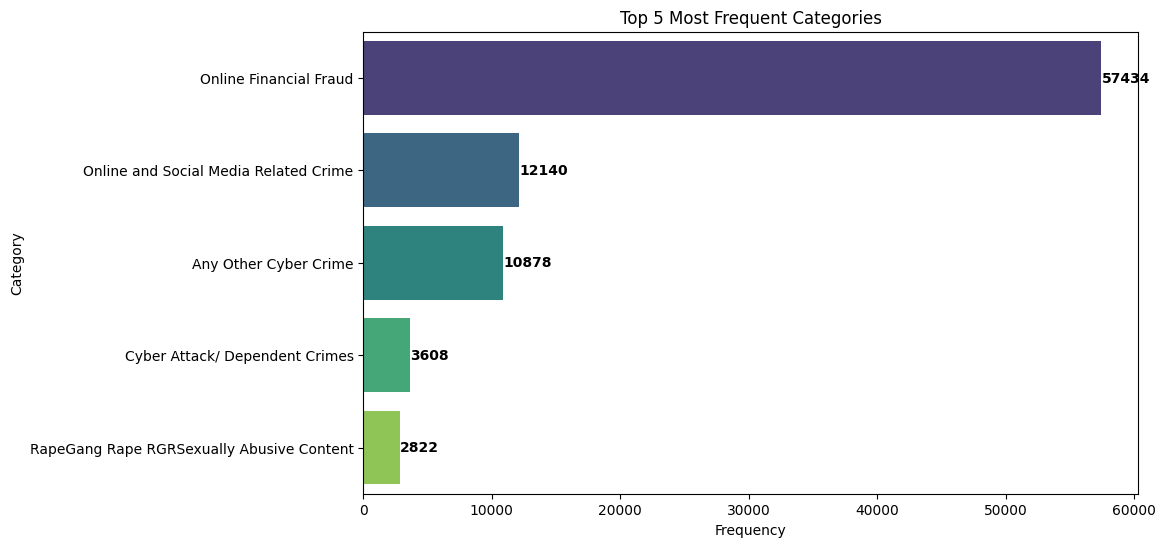

In [ ]:
%%time
# 5. Top 5 most used categories graph with count displayed
top_5_categories = category_counts.head(5)
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=top_5_categories.values, y=top_5_categories.index, palette="viridis")

# Display counts on top of each bar
for i, count in enumerate(top_5_categories.values):
    plt.text(count + 10, i, str(count), va='center', color='black', fontweight='bold')

plt.title("Top 5 Most Frequent Categories")
plt.xlabel("Frequency")
plt.ylabel("Category")
plt.show()

C:\Users\sbsws\AppData\Local\Temp\ipykernel_30312\2117833544.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_subcategories.values, y=top_5_subcategories.index, palette="magma")


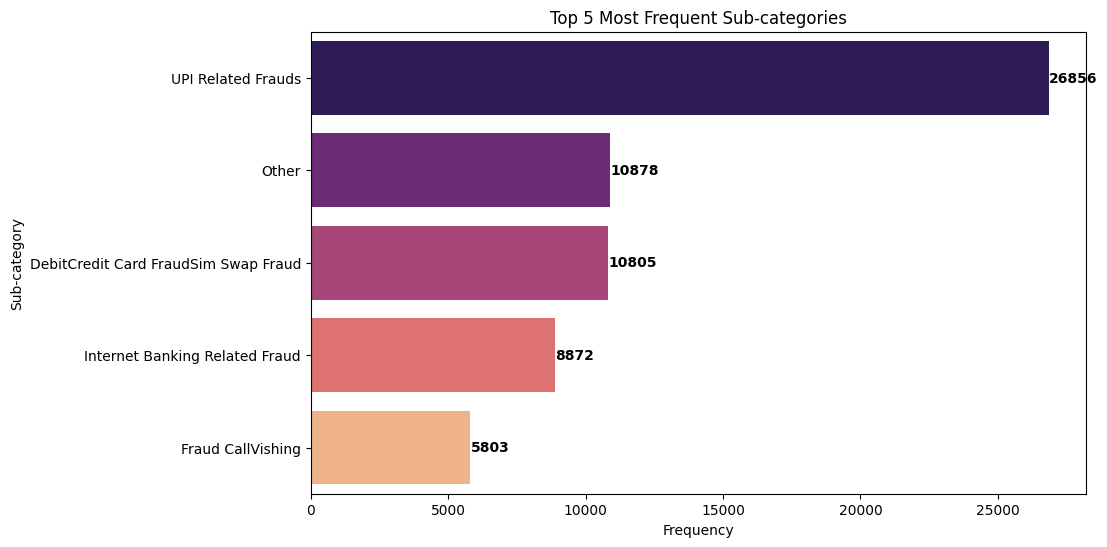

In [ ]:
%%time
# 6. Top 5 most used sub-categories graph
top_5_subcategories = subcategory_counts.head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_5_subcategories.values, y=top_5_subcategories.index, palette="magma")

for i, count in enumerate(top_5_subcategories.values):
    plt.text(count + 10, i, str(count), va='center', color='black', fontweight='bold')

plt.title("Top 5 Most Frequent Sub-categories")
plt.xlabel("Frequency")
plt.ylabel("Sub-category")
plt.show()

In [ ]:
%%time
import pandas as pd
import spacy
import re
from nltk.corpus import stopwords
import nltk

# Download NLTK stop words if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
additional_stopwords = [
    'said', 'also', 'like', 'just', 'get', 'know',
    'one', 'would', 'could', 'time', 'make',
    'see', 'think', 'go', 'want', 'say', 'sir', 'he', 'she', 'i', 'we', 'them', 'like'
]

# Update the stop_words set with additional stopwords
stop_words.update(additional_stopwords)

# Load spaCy model for NER and POS tagging
nlp = spacy.load("en_core_web_sm")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sbsws\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# stop_words

In [ ]:
%%time
df['crimeaditionalinfo'] = df['crimeaditionalinfo'].fillna('')

# 1. Create 'proper_nouns' column
def extract_proper_nouns(text):
    if isinstance(text, str):  # Ensure the input is a string
        doc = nlp(text)
        proper_nouns = []
        temp_entity = []

        for token in doc:
            # Check if the token is a proper noun
            if token.pos_ == "PROPN":
                temp_entity.append(token.text)
            else:
                # If a proper noun sequence has ended, join and add to the list
                if temp_entity:
                    proper_nouns.append(" ".join(temp_entity))
                    temp_entity = []

        # Join any remaining proper nouns and handle adjacent sequences
        if temp_entity:
            proper_nouns.append(" ".join(temp_entity))

        return ", ".join(proper_nouns)
    else:
        return ''  # Return an empty string if the input is not a string

# Apply the function to create the 'proper_nouns' column
df['proper_nouns'] = df['crimeaditionalinfo'].apply(extract_proper_nouns)

In [ ]:
%%time
# 2. Create 'cleaned_crimeaditionalinfo' column
def clean_text(text):
    # Lowercase the text
    text = text.lower()
    # Remove special characters, numbers, punctuation
    text = re.sub(r'[^a-z\s]', '', text)
    # Tokenize and remove stop words
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    # Join back the cleaned tokens
    return " ".join(tokens)

df['cleaned_crimeaditionalinfo'] = df['crimeaditionalinfo'].apply(clean_text)


                                  crimeaditionalinfo       proper_nouns  \
0  I had continue received random calls and abusi...                      
1  The above fraudster is continuously messaging ...           WhatsApp   
2  He is acting like a police and demanding for m...                      
3  In apna Job I have applied for job interview f...                Job   
4  I received a call from lady stating that she w...  February, Kurnool   

                          cleaned_crimeaditionalinfo  
0  continue received random calls abusive message...  
1  fraudster continuously messaging asking pay mo...  
2  acting like police demanding money adding sect...  
3  apna job applied job interview telecalling res...  
4  received call lady stating send new phone vivo...  


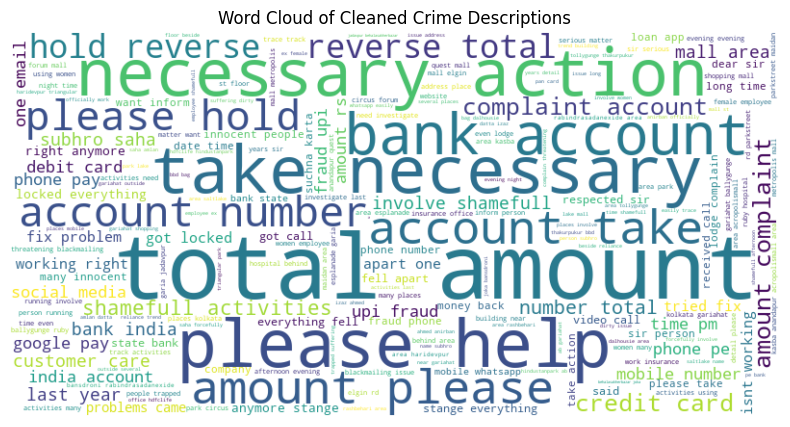

In [ ]:
from wordcloud import WordCloud

# Combine all the text into a single string
text_combined = " ".join(df['cleaned_crimeaditionalinfo'].dropna())

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_combined)

# Plotting the Word Cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Cleaned Crime Descriptions')
plt.show()

In [ ]:
import gensim
from gensim import corpora
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models
import nltk
import pandas as pd
import numpy as np

# Ensure the necessary resources are downloaded
nltk.download('punkt')

# Tokenize the cleaned text
tokenized_text = [word_tokenize(text) for text in df['cleaned_crimeaditionalinfo'].dropna()]

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(tokenized_text)
dictionary.filter_extremes(no_below=5, no_above=0.5)  # Filter out rare and common words
corpus = [dictionary.doc2bow(text) for text in tokenized_text]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=10)

# Assign topics to each document
df['topic'] = [max(lda_model.get_document_topics(bow), key=lambda x: x[1])[0] for bow in corpus]

# Display the assigned topics
print(df[['cleaned_crimeaditionalinfo', 'topic']].head())

# Get the document-topic distribution
doc_topic_dist = lda_model.get_document_topics(corpus, minimum_probability=0)

# Convert the document-topic distribution to a dense format
dense_doc_topic_dist = np.zeros((len(corpus), lda_model.num_topics))
for i, doc in enumerate(doc_topic_dist):
    for topic_id, prob in doc:
        dense_doc_topic_dist[i, topic_id] = prob

# Check the shapes
print("Dense Document-Topic Distribution Shape:", dense_doc_topic_dist.shape)
print("Number of Topics:", lda_model.num_topics)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sbsws\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                          cleaned_crimeaditionalinfo  topic
0  continue received random calls abusive message...      2
1  fraudster continuously messaging asking pay mo...      2
2  acting like police demanding money adding sect...      2
3  apna job applied job interview telecalling res...      2
4  received call lady stating send new phone vivo...      2
Dense Document-Topic Distribution Shape: (93686, 5)
Number of Topics: 5


In [ ]:
# # Visualize the topics
# vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary, doc_topic_dist=dense_doc_topic_dist)
# pyLDAvis.display(vis)

In [ ]:
# Print the top words for each topic
num_topics = 5  # Make sure this matches the number of topics you trained your model on
for idx, topic in lda_model.print_topics(num_words=5):
    print(f"Topic {idx}: {topic}")

Topic 0: 0.031*"bank" + 0.030*"amount" + 0.026*"total" + 0.026*"account" + 0.022*"fraud"
Topic 1: 0.027*"amount" + 0.026*"account" + 0.024*"rs" + 0.022*"card" + 0.021*"fraud"
Topic 2: 0.018*"money" + 0.013*"please" + 0.013*"number" + 0.013*"loan" + 0.011*"help"
Topic 3: 0.054*"area" + 0.034*"mall" + 0.028*"activities" + 0.027*"shamefull" + 0.020*"involve"
Topic 4: 0.036*"even" + 0.031*"everything" + 0.026*"like" + 0.021*"email" + 0.020*"got"


In [ ]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

                          cleaned_crimeaditionalinfo  topic_nmf
0  continue received random calls abusive message...          4
1  fraudster continuously messaging asking pay mo...          4
2  acting like police demanding money adding sect...          4
3  apna job applied job interview telecalling res...          4
4  received call lady stating send new phone vivo...          4
Topic #0:
area mall activities shamefull involve places gariahat sir person time
Topic #1:
bank amount account total fraud please take action complaint necessary
Topic #2:
hai ki se ke mere aur kar ko ka kiya
Topic #3:
even everything like got email one fix anymore stange dont
Topic #4:
money rs number call pay help asked said card got


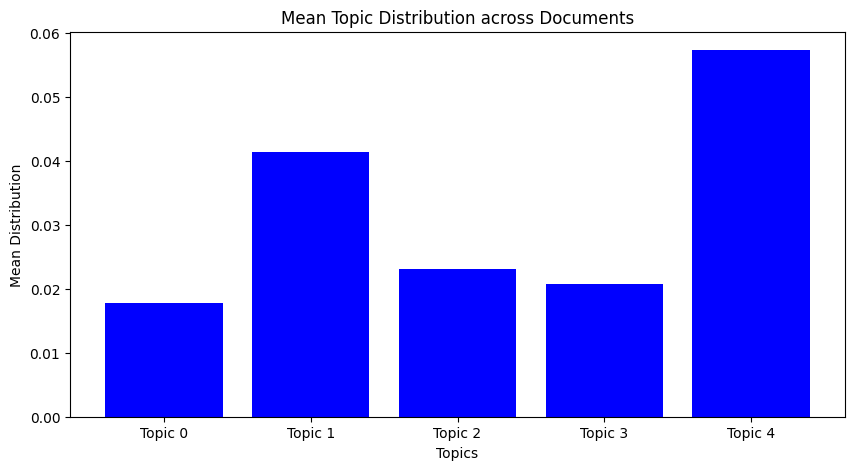

In [ ]:
stop_words=list(stop_words)
tokenized_text = [' '.join(words) for words in tokenized_text]

# Create Document-Term Matrix using CountVectorizer
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words=stop_words)
dtm = vectorizer.fit_transform(tokenized_text)

# Fit NMF model
num_topics = 5  # Specify the number of topics
nmf_model = NMF(n_components=num_topics, random_state=1)
nmf_model.fit(dtm)

# Assign topics to each document
topic_assignments = nmf_model.transform(dtm)
df['topic_nmf'] = np.argmax(topic_assignments, axis=1)

# Display the assigned topics
print(df[['cleaned_crimeaditionalinfo', 'topic_nmf']].head())

# Function to display the top words for each topic
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

# Display top words for each topic
display_topics(nmf_model, vectorizer.get_feature_names_out(), 10)

# Optionally, visualize topic distribution
plt.figure(figsize=(10, 5))
plt.bar(range(num_topics), topic_assignments.mean(axis=0), color='blue')
plt.xlabel('Topics')
plt.ylabel('Mean Distribution')
plt.title('Mean Topic Distribution across Documents')
plt.xticks(range(num_topics), [f'Topic {i}' for i in range(num_topics)])
plt.show()

In [ ]:
end_time = time.time()
total_runtime = end_time - start_time
print(f"Total runtime: {total_runtime:.2f} seconds")